# Анализ рекламных источников

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import timedelta

In [2]:
game_actions = pd.read_csv('game_actions.csv')

In [3]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [6]:
game_actions.duplicated().sum()

1

In [7]:
game_actions = game_actions.drop_duplicates()

In [8]:
game_actions[game_actions['building_type'].isna()]['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

In [9]:
game_actions[game_actions['project_type'].isna()]['event'].unique()

array(['building', 'finished_stage_1'], dtype=object)

Считаем пропуски в building_type и project_type "полезными", т.к. значения ивентов, соответствующих пропускам, не предполагают наличия каких-либо значений в данных колонках.

In [10]:
ad_costs = pd.read_csv('ad_costs.csv')

In [11]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [12]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [13]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

In [14]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [15]:
user_source = pd.read_csv('user_source.csv')

In [16]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [17]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


### Вывод

Загрузили и предобработали данные. Привели стоблцы с датами к нужным типам, определили, что пропуски в game_actions.csv не баг и не ошибка.

## Исследовательский анализ данных

In [18]:
users = game_actions.groupby('user_id').agg({'event':'count'}).reset_index().sort_values(by='event',ascending=False)

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13576 entries, 11329 to 6009
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   event    13576 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 318.2+ KB


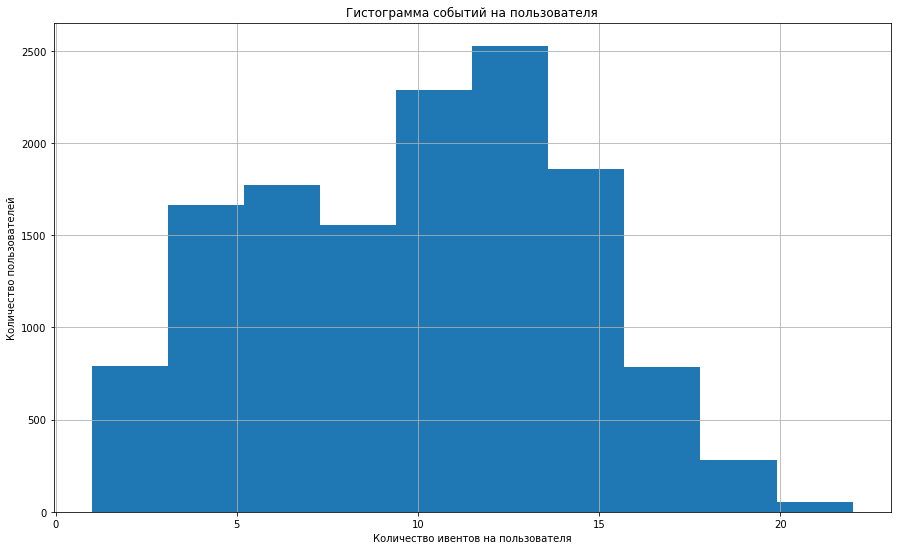

In [20]:
users['event'].hist(figsize=(15,9))
plt.title('Гистограмма событий на пользователя')
plt.xlabel('Количество ивентов на пользователя')
plt.ylabel('Количество пользователей')
None

In [21]:
users['event'].median()

10.0

In [22]:
game_actions['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [23]:
game_actions['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

В среднем на пользователя приходится 10 ивентов, общее количество уникальных пользователей 13576, данные представлены за период  2020-05-04 00:00:01 - 2020-06-05 12:32:49.

Создадим пользовательские профили

In [24]:
game_actions_w_ad = game_actions.merge(user_source , on=['user_id'], how='left')

In [25]:
game_actions_w_ad.head()

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct


In [26]:
profiles = game_actions_w_ad.groupby(['user_id','source']).agg({'event':'count','event_datetime':['first','last']}).reset_index()

In [27]:
profiles.columns = profiles.columns.droplevel()

In [28]:
profiles.columns=['user_id','source','events_count','first_ts','last_ts']

In [29]:
profiles['lifetime'] = (profiles['last_ts'] - profiles['first_ts']).dt.days

In [30]:
profiles['first_day'] = profiles['first_ts'].dt.date
profiles['first_day'] = pd.to_datetime(profiles['first_day'])

In [31]:
profiles.head()

,user_id,source,events_count,first_ts,last_ts,lifetime,first_day
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13,2020-05-06 01:07:37,2020-05-20 11:26:06,14,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,9,2020-05-06 03:09:12,2020-05-18 10:46:52,12,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,4,2020-05-05 18:08:52,2020-05-14 09:21:27,8,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,9,2020-05-05 21:02:05,2020-05-12 07:40:47,6,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,12,2020-05-05 13:49:58,2020-05-22 02:46:45,16,2020-05-05


Посчитаем стоимость привлечения каждого пользователя. Пользователи начали приходить с 04.05.2020, а рекламные расходы числятся с 03.05.2020. Создадим новую таблицу на основе таблицы с тратами на рекламу, в которой искусственно сдвинем даты затрат на рекламу на 1 день, чтобы сматчить с данными по пользователским профилям и посчитать CAC.

In [32]:
ad_costs_w_cac = ad_costs
ad_costs_w_cac

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [33]:
ad_costs_w_cac['day'] = ad_costs_w_cac['day'] + timedelta(days=1)

In [34]:
ad_costs_w_cac.head()

,source,day,cost
0,facebook_ads,2020-05-04,935.882786
1,facebook_ads,2020-05-05,548.354480
2,facebook_ads,2020-05-06,260.185754
3,facebook_ads,2020-05-07,177.982200
4,facebook_ads,2020-05-08,111.766796


In [35]:
cohorts = profiles.groupby(['first_day','source']).agg({'user_id':'count'}).reset_index().rename(columns={'first_day':'day','user_id':'cohort_size'})

In [36]:
cohorts.head()

,day,source,cohort_size
0,2020-05-04,facebook_ads,1184
1,2020-05-04,instagram_new_adverts,1452
2,2020-05-04,yandex_direct,2078
3,2020-05-04,youtube_channel_reklama,1146
4,2020-05-05,facebook_ads,694


In [37]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          28 non-null     datetime64[ns]
 1   source       28 non-null     object        
 2   cohort_size  28 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 800.0+ bytes


In [38]:
ad_costs_w_cac = ad_costs_w_cac.merge(cohorts,on=['day','source'])

In [39]:
ad_costs_w_cac['CAC'] = ad_costs_w_cac['cost']/ad_costs_w_cac['cohort_size']

In [40]:
ad_costs_w_cac.head()

,source,day,cost,cohort_size,CAC
0,facebook_ads,2020-05-04,935.882786,1184,0.790442
1,facebook_ads,2020-05-05,548.354480,694,0.790136
2,facebook_ads,2020-05-06,260.185754,345,0.754162
3,facebook_ads,2020-05-07,177.982200,224,0.794563
4,facebook_ads,2020-05-08,111.766796,139,0.804078


In [41]:
ad_costs_w_cac = ad_costs_w_cac.rename(columns={'day':'first_day'})

In [42]:
profiles = profiles.merge(ad_costs_w_cac[['source','first_day','cohort_size','CAC']],on=['first_day','source'])

In [43]:
profiles.head()

,user_id,source,events_count,first_ts,last_ts,lifetime,first_day,cohort_size,CAC
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13,2020-05-06 01:07:37,2020-05-20 11:26:06,14,2020-05-06,345,0.754162
1,01303c2e-7de1-4742-8c3e-daf182b67b9f,facebook_ads,4,2020-05-06 07:05:11,2020-05-08 22:30:49,2,2020-05-06,345,0.754162
2,0136963c-c45c-4edb-92d8-205bd50a4d36,facebook_ads,12,2020-05-06 14:00:20,2020-05-25 08:56:48,18,2020-05-06,345,0.754162
3,018793d6-38c8-450a-bd54-8c181d920f1a,facebook_ads,14,2020-05-06 07:05:52,2020-05-24 23:52:53,18,2020-05-06,345,0.754162
4,01e2b256-4519-493f-b010-4a90a2755245,facebook_ads,9,2020-05-06 22:16:07,2020-05-21 04:52:31,14,2020-05-06,345,0.754162


Дополнили пользовательские профили стоимостью привлечения и размером когорты. Теперь нужно добавить данные о прохождении 1 уровня.

In [44]:
def finished_stage_1(row):
    if row['event']=='finished_stage_1':
          return True
    else:
        return False

In [45]:
game_actions['finished_stage_1'] = game_actions.apply(finished_stage_1,axis=1)

In [46]:
game_actions[game_actions['event']=='finished_stage_1'].head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,True
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,True
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,True
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,True
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,True


In [47]:
users_finished_1 = game_actions.groupby('user_id').agg({'finished_stage_1':'sum'}).reset_index()

In [48]:
users_finished_1 = users_finished_1[users_finished_1['finished_stage_1']==1]

In [49]:
users_finished_1.head()

,user_id,finished_stage_1
3,001d39dc-366c-4021-9604-6a3b9ff01e25,1
6,003ee7e8-6356-4286-a715-62f22a18d2a1,1
7,004074f8-251a-4776-922c-8348dca1a2f6,1
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,1
10,0056c007-c082-43cc-bdef-afc49bca4cb9,1


In [50]:
profiles = profiles.merge(users_finished_1,on=['user_id'],how='left')

In [51]:
profiles['finished_stage_1'] = profiles['finished_stage_1'].fillna(0).astype('int')

In [52]:
profiles

,user_id,source,events_count,first_ts,last_ts,lifetime,first_day,cohort_size,CAC,finished_stage_1
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13,2020-05-06 01:07:37,2020-05-20 11:26:06,14,2020-05-06,345,0.754162,0
1,01303c2e-7de1-4742-8c3e-daf182b67b9f,facebook_ads,4,2020-05-06 07:05:11,2020-05-08 22:30:49,2,2020-05-06,345,0.754162,0
2,0136963c-c45c-4edb-92d8-205bd50a4d36,facebook_ads,12,2020-05-06 14:00:20,2020-05-25 08:56:48,18,2020-05-06,345,0.754162,1
3,018793d6-38c8-450a-bd54-8c181d920f1a,facebook_ads,14,2020-05-06 07:05:52,2020-05-24 23:52:53,18,2020-05-06,345,0.754162,1
4,01e2b256-4519-493f-b010-4a90a2755245,facebook_ads,9,2020-05-06 22:16:07,2020-05-21 04:52:31,14,2020-05-06,345,0.754162,0
...,...,...,...,...,...,...,...,...,...,...
13571,f904bb06-e8f9-4aef-8773-5a47f12ac103,yandex_direct,5,2020-05-08 15:11:26,2020-05-12 21:07:54,4,2020-05-08,239,0.478784,0
13572,fa1ffc17-0032-4b4d-ac0d-6c75b890db9e,yandex_direct,12,2020-05-08 06:17:28,2020-05-24 12:50:48,16,2020-05-08,239,0.478784,1
13573,fd7d35ce-430b-40e0-a325-9d2b27b425e5,yandex_direct,9,2020-05-08 23:59:00,2020-05-25 00:18:28,16,2020-05-08,239,0.478784,1
13574,fec9a806-0291-4d46-914b-e4dd14ad3864,yandex_direct,10,2020-05-08 23:44:14,2020-05-20 01:25:10,11,2020-05-08,239,0.478784,0


In [53]:
profiles_pivot = profiles.pivot_table(index='source',values=['user_id','lifetime','events_count','finished_stage_1','CAC'],aggfunc={'lifetime':'median','events_count':'median','finished_stage_1':'sum','CAC':'mean','user_id':'count'}).reset_index()

In [54]:
profiles_pivot

,source,CAC,events_count,finished_stage_1,lifetime,user_id
0,facebook_ads,0.785365,10,1150,10,2726
1,instagram_new_adverts,0.645785,10,1466,10,3347
2,yandex_direct,0.463590,10,2042,10,4817
3,youtube_channel_reklama,0.397662,10,1159,10,2686


In [55]:
profiles_pivot['CAC_%_of_all'] = round(profiles_pivot['CAC']*100/profiles_pivot['CAC'].sum(),2)

In [56]:
profiles_pivot['finished_stage_1_%_of_all'] = round(profiles_pivot['finished_stage_1']*100/profiles_pivot['user_id'],2)

In [57]:
profiles_pivot['users_%_of_all'] = profiles_pivot['user_id']*100/profiles_pivot['user_id'].sum()

In [58]:
profiles_pivot

,source,CAC,events_count,finished_stage_1,lifetime,user_id,CAC_%_of_all,finished_stage_1_%_of_all,users_%_of_all
0,facebook_ads,0.785365,10,1150,10,2726,34.26,42.19,20.079552
1,instagram_new_adverts,0.645785,10,1466,10,3347,28.17,43.80,24.653801
2,yandex_direct,0.463590,10,2042,10,4817,20.22,42.39,35.481732
3,youtube_channel_reklama,0.397662,10,1159,10,2686,17.35,43.15,19.784915


Посчитали медиану количества ивентов и лайфтайм юзеров в разрезе по источникам - они получились одинаковые. Подсчитали доли CAC и прошедших уровень 1, теперь сравним.

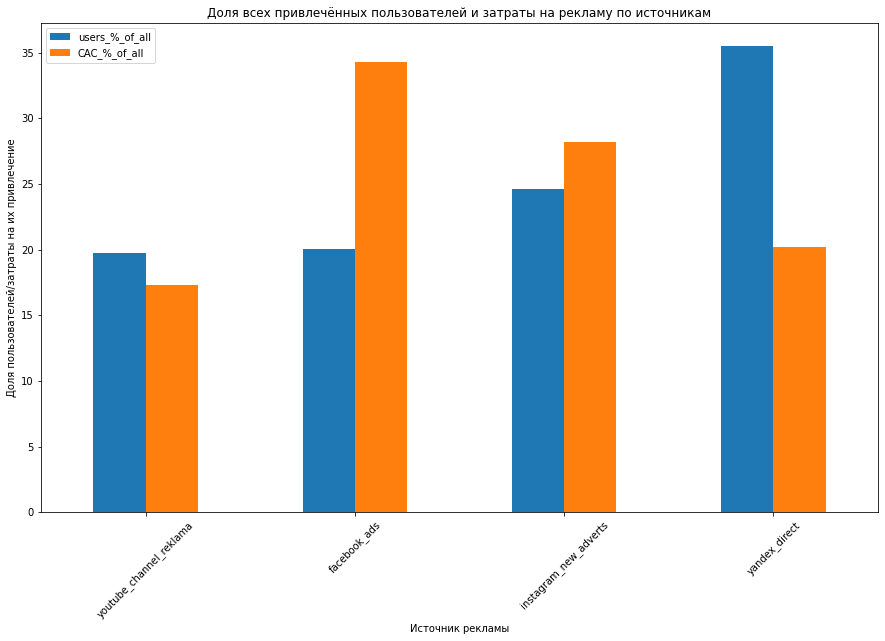

In [59]:
profiles_pivot.sort_values(by=['users_%_of_all','CAC']).plot(x='source',y=['users_%_of_all','CAC_%_of_all'],kind='bar',figsize=(15,9))
plt.title('Доля всех привлечённых пользователей и затраты на рекламу по источникам')
plt.xlabel('Источник рекламы')
plt.ylabel('Доля пользователей/затраты на их привлечение')
plt.xticks(rotation = 45)
None

Из данного графика видно, что фейсбук и инстаграм не так эффективны по привлечению пользователей, как ютуб и яндекс - доли средств затраченных на рекламу выше, чем доли привлечённых пользователей. При этом, затраты на пользователя, в среднем, у яндекса больше чем у ютуба на ~3%, а доля привлечённых пользователей больше у яндекса чем у ютуба на ~15%. Посмотрим отдельно на каждый источник, какая доля привлечённых пользователей прошла 1ый уровень.

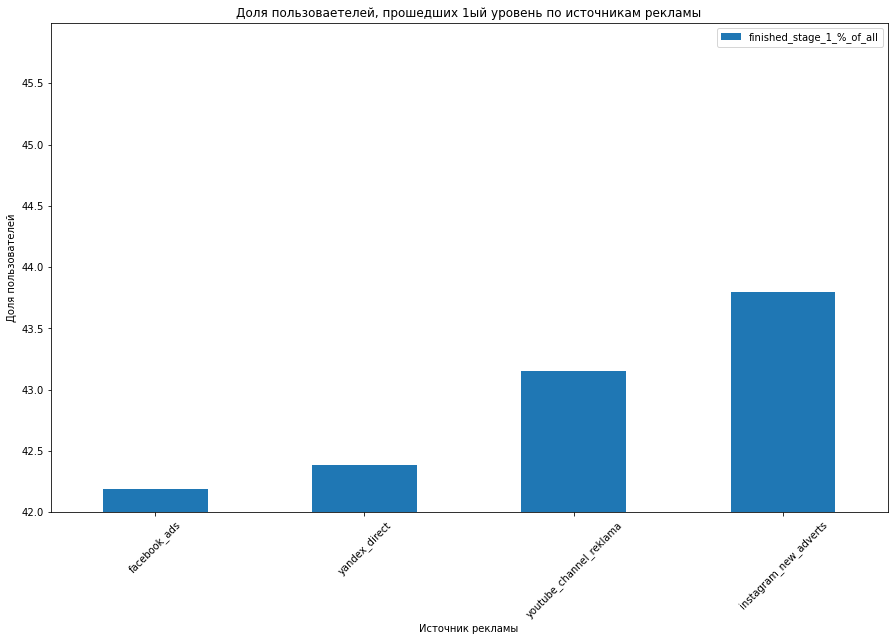

In [60]:
profiles_pivot.sort_values(by='finished_stage_1_%_of_all').plot(x='source',y='finished_stage_1_%_of_all',kind='bar',figsize=(15,9))
plt.title('Доля пользоваетелей, прошедших 1ый уровень по источникам рекламы')
plt.xlabel('Источник рекламы')
plt.ylabel('Доля пользователей')
plt.xticks(rotation = 45)
plt.ylim(bottom=42)
None

Разница в относительных долях прошедших 1ый уровень от привлечённых пользователей с источника не такая большая, но в процентных пунктах разброс составляет до 1.5пп. Истраграм лучше всего показывает себя, затем идёт ютуб, яндекс и фейсбук.

### Вывод

На основе исследования данных, можем сказать что более эффективными с точки зрения привлечения пользователей относительно затрат на привлечение являются яндекс и ютуб, где яндекс лидирует по количествую привлечённых пользователей при почти таких же затратах. Аудитория из ютуба приходит более вовлечённая, что показывает более высокую долю закончивших первый уровень, относительно яндекса. Общая активность пользователей и их лайфтайм в разрезе по рекламным исчтоникам одинаковые.

## Проверка статистических гипотез

Проверим гипотезу о том, что время завершения уровня различается в зависимости способа прохождения (реализация проекта "разработка орбитальной сборки спутников" или убийство противника). Нулевая гипотеза: среднее время завершения уровня не различается в зависимости от способа прохождения. Альтернативная: среднее время прохождения 1ого уровня через постройку станции больше, чем через победу над противником. Для проверки гипотезы используем стат. метод t-тест для проверки равенства среднего двух независимых выборок.

In [61]:
game_actions[game_actions['finished_stage_1']==True]

,event_datetime,event,building_type,user_id,project_type,finished_stage_1
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,True
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,True
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,True
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,True
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,True
...,...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,True
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,True
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,True
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,True


In [62]:
users_finished_proj = game_actions.groupby('user_id').agg({'project_type':'count'}).reset_index()

In [63]:
users_finished_proj = users_finished_proj[users_finished_proj['project_type']==1]

In [64]:
users_finished_proj.head()

,user_id,project_type
13,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,1
24,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,1
26,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,1
33,00de2809-403e-4476-a2f7-ca1b11700190,1
36,00e83261-5fd4-4939-9616-802b5a0202c6,1


In [65]:
profiles_hyp = profiles.merge(users_finished_proj, on=['user_id'],how='left')

In [66]:
profiles_hyp['project_type'] = profiles_hyp['project_type'].fillna(0).astype('int')

In [67]:
profiles_hyp.head()

,user_id,source,events_count,first_ts,last_ts,lifetime,first_day,cohort_size,CAC,finished_stage_1,project_type
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13,2020-05-06 01:07:37,2020-05-20 11:26:06,14,2020-05-06,345,0.754162,0,0
1,01303c2e-7de1-4742-8c3e-daf182b67b9f,facebook_ads,4,2020-05-06 07:05:11,2020-05-08 22:30:49,2,2020-05-06,345,0.754162,0,0
2,0136963c-c45c-4edb-92d8-205bd50a4d36,facebook_ads,12,2020-05-06 14:00:20,2020-05-25 08:56:48,18,2020-05-06,345,0.754162,1,1
3,018793d6-38c8-450a-bd54-8c181d920f1a,facebook_ads,14,2020-05-06 07:05:52,2020-05-24 23:52:53,18,2020-05-06,345,0.754162,1,1
4,01e2b256-4519-493f-b010-4a90a2755245,facebook_ads,9,2020-05-06 22:16:07,2020-05-21 04:52:31,14,2020-05-06,345,0.754162,0,0


In [68]:
#время прохождения уровня путём победы над другим игроком
winners_pvp_time = profiles_hyp.query('finished_stage_1==1 & project_type==0')['lifetime'] 
#время прохождения уровня через постройку станции
winners_pve_time = profiles_hyp.query('finished_stage_1==1 & project_type==1')['lifetime']

In [69]:
print(winners_pve_time.mean())
winners_pvp_time.mean()

12.963022508038586


10.606175651733738

In [70]:
alpha = 0.05 #уровень стат. значимости исследования
result_1 = st.ttest_ind(winners_pve_time,winners_pvp_time,alternative='greater')
print('p-value: ',result_1.pvalue)
if (result_1.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value:  9.441417696184596e-98
Отвергаем нулевую гипотезу


По результату стат. теста можем сказать, что среднее время прохождение через PVE больше среднего времени прохождения через PVP.

Проверим вторую гипотезу о том, что среднее количество ивентов пользователя различается в зависимости способа прохождения (реализация проекта "разработка орбитальной сборки спутников" или убийство противника). Нулевая гипотеза: среднее количество ивентов пользователя не различается в зависимости от способа прохождения. Альтернативная: среднее количество ивентов пользователя построившего орбитальную станцию больше, чем среднее количество ивентов пользователя победившего противника. Для проверки гипотез используем стат. метод t-тест для проверки равенства среднего двух независимых выборок.

In [71]:
#количество ивентов пользователя с PVP победой
winners_pvp_events = profiles_hyp.query('finished_stage_1==1 & project_type==0')['events_count'] 
#количество ивентов пользователя с PVE победой
winners_pve_events = profiles_hyp.query('finished_stage_1==1 & project_type==1')['events_count']

In [72]:
print(winners_pve_events.mean())
winners_pvp_events.mean()

14.64790996784566


10.411541381928625

In [73]:
result_2 = st.ttest_ind(winners_pve_events,winners_pvp_events,alternative='greater')
print('p-value: ',result_2.pvalue)
if (result_2.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.0
Отвергаем нулевую гипотезу


Среднее количество ивентов пользователей при прохождении через постройку станции больше, чем через победу над противником.

### Вывод

<p>Было сформулировано и проверено 2 гипотезы:</p> 
<p>1. Cреднее время прохождения 1ого уровня через постройку станции и через победу над противником равны;</p>
<p>2. Cреднее количество ивентов пользоваталей завершивших уровень через постройку станции и через победу над противником равны.</p>  
<p>Результаты: среднее время на прохождение уровня через победу над противником меньше, среднее количество ивентов среди пользователей победивших противника в PVP меньше.</p> 

## Общий вывод

На основе проведённого исследования, можно рекоммендовать рекламный источник yandex_direct как самый эффективный по соотношению затрат на привлечение пользователей к доле привлечённых пользователей и их дальнейшей активности. Так же, на основе проведённых стат. тестов можно утверждать следующее: среднее время на прохождение уровня через победу над противником меньше, чем через постройку станции. Среднее количество ивентов среди пользователей победивших противника в PVP меньше, чем среди пользователей построивших станцию.